In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Sacramento.csv")

X = df[['sqft']]
y = df['price']

## Visualización de datos

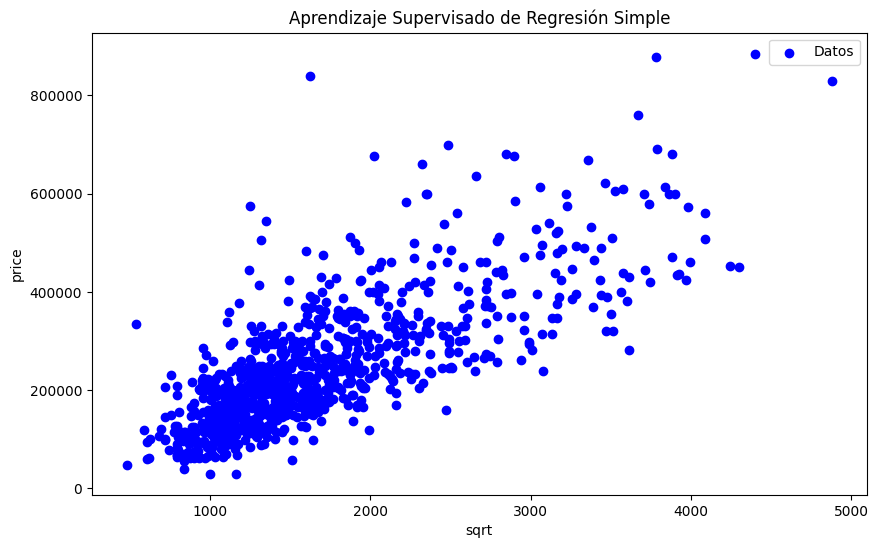

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.title('Aprendizaje Supervisado de Regresión Simple')
plt.xlabel('sqrt')
plt.ylabel('price')
plt.legend()
plt.show()

## Split Train-Test

In [23]:
# SPLIT
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train[['sqft']]
y_train = df_train['price']
X_test = df_test[['sqft']]
y_test = df_test['price']


## Creación de modelo líneal simple y evaluación

Ayuda: [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [24]:
# LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X_train, y_train)

# MAKE PREDICTIONS & EVALUATE THE MODEL
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 8153409280.20
Mean Squared Error: 6790590462.36


## Creación de modelo polinómico simple y evaluación

Ayuda: [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
degree = 5 # DEGREE OF THE POLYNOMIAL
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

y_pred_train = model.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 8071134144.24
Mean Squared Error: 6709083221.67


In [28]:
X_train

,sqft
54,1185
299,1718
501,2442
811,3885
394,1351
...,...
106,1284
270,2494
860,1373
435,1739


In [43]:
X_train_poly

array([[1.00000000e+00, 1.18500000e+03, 1.40422500e+06, 1.66400662e+09,
        1.97184785e+12, 2.33663970e+15],
       [1.00000000e+00, 1.71800000e+03, 2.95152400e+06, 5.07071823e+09,
        8.71149392e+12, 1.49663466e+16],
       [1.00000000e+00, 2.44200000e+03, 5.96336400e+06, 1.45625349e+10,
        3.55617102e+13, 8.68416963e+16],
       ...,
       [1.00000000e+00, 1.37300000e+03, 1.88512900e+06, 2.58828212e+09,
        3.55371135e+12, 4.87924568e+15],
       [1.00000000e+00, 1.73900000e+03, 3.02412100e+06, 5.25894642e+09,
        9.14530782e+12, 1.59036903e+16],
       [1.00000000e+00, 1.38000000e+03, 1.90440000e+06, 2.62807200e+09,
        3.62673936e+12, 5.00490032e+15]])

In [38]:
y_train

,price
54,178480
299,361948
501,331000
811,680000
394,158000
...,...
106,280908
270,280000
860,160000
435,221000
